In [10]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Preparation

In [11]:
model = lambda x: x * 2.0 + 1.0
x_train = np.array([0, 1]).reshape(-1,1)
y_train = model(x_train)
x_test = np.array([2,3,4]).reshape(-1,1)
y_test = model(x_test)

## Function Definitinos

In [12]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD()
test_loss = tf.keras.metrics.Mean(name='test_loss')

## Training and Testing

In [13]:
def train_step(x_train, y_train):
    with tf.GradientTape() as tape:
        pred = wb(x_train)
        loss = loss_fn(y_train, pred)
    delta_wb = tape.gradient(loss, wb.trainable_variables)
    optimizer.apply_gradients(zip(delta_wb, wb.trainable_variables))

In [19]:
with tf.GradientTape() as tape:
    pred = wb(x_train)
    loss = loss_fn(y_train, pred)
delta_wb = tape.gradient(loss, wb.trainable_variables)
optimizer.apply_gradients(zip(delta_wb, wb.trainable_variables))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [25]:
delta_wb, wb.trainable_variables

([<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-5.9604645e-06]], dtype=float32)>,
  <tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.9604645e-06], dtype=float32)>],
 [<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9999821]], dtype=float32)>,
  <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.0000119], dtype=float32)>])

In [34]:
W = tf.Variable([[1.]])
dw = tf.constant([[0.1]])
#optimizer.apply_gradients(zip([W],[dw]))
dw, W

(<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.1]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>)

In [4]:
def test_step(x_test, y_test):
    pred = wb(x_train)
    loss = loss_fn(y_train, pred)
    test_loss(loss)

In [4]:
train_step_tf = tf.function(train_step)
test_step_tf = tf.function(test_step)

def train(N_epoch=1000, train_step=train_step, test_step=test_step):
    J_list = np.zeros(N_epoch)
    test_loss.reset_states()    
    for e in range(N_epoch):
        train_step(x_train, y_train)    
        test_step(x_test, y_test)
        J_list[e] = test_loss.result().numpy()
    return J_list

2022-01-25 01:45:40.086725: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-25 01:45:40.087584: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3599995000 Hz


w=2.0, b=1.0


Text(0, 0.5, 'J')

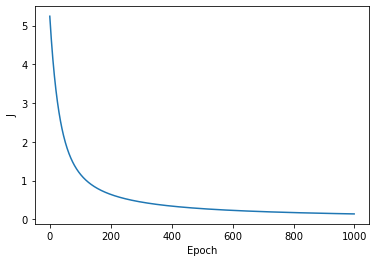

In [5]:
wb = tf.keras.models.Sequential()
wb.add(tf.keras.layers.Dense(1,input_shape=(1,)))

J_list = train(train_step=train_step_tf, test_step=test_step_tf)        
w_tr, b_tr = wb.get_weights()
print(f"w={w_tr[0,0]:.2}, b={b_tr[0]:.2}")

plt.plot(J_list)
plt.xlabel("Epoch")
plt.ylabel("J")

In [6]:
%time J_list = train(N_epoch=100, train_step=train_step)
%time J_list = train(N_epoch=100, train_step=train_step_tf, test_step=test_step_tf)
%time J_list = train(N_epoch=1000, train_step=train_step)
%time J_list = train(N_epoch=1000, train_step=train_step_tf, test_step=test_step_tf)

CPU times: user 1.61 s, sys: 758 ms, total: 2.36 s
Wall time: 596 ms
CPU times: user 1.35 s, sys: 1.64 s, total: 2.98 s
Wall time: 376 ms
CPU times: user 15 s, sys: 8.9 s, total: 23.9 s
Wall time: 5.79 s
CPU times: user 8.3 s, sys: 10.1 s, total: 18.4 s
Wall time: 2.31 s


In [9]:
16.6/8.28

2.0048309178743966